# Short Time FFT

In [41]:
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
import librosa
from librosa.feature import chroma_stft
import simpleaudio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
# data, fs = librosa.load('soudns/voicemail-12893193856.m4a')
data, fs = librosa.load('soudns/gmajor-scale-2octave-up-down-up-down.wav', sr=44100)
N = 1000
st = ShortTimeFFT(win=gaussian(N, N/2), hop=60, fs=fs, scale_to='magnitude')
z = st.stft(data)
c = np.abs(z)
ll = np.quantile(np.log(c).ravel(), .01)  # lower limit
plot_data = np.where(np.log(c) < ll, ll, np.log(c))

In [47]:
cs = chroma_stft(y=data, sr=fs, n_fft=N, hop_length=60)

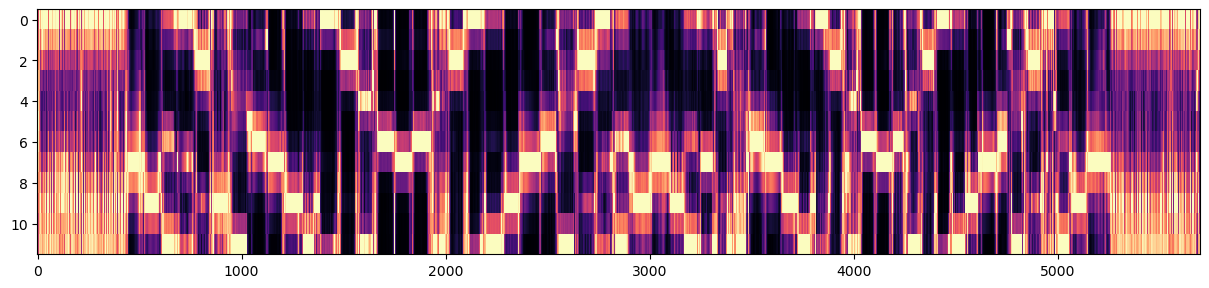

In [59]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.imshow(cs, aspect=100, cmap='magma', interpolation='none')
plt.show()

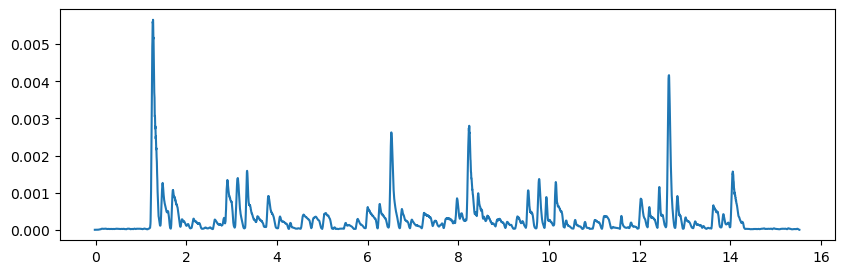

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(st.t(len(data)), np.sum(np.pow(c, 2), axis=0))
plt.show()

In [29]:
tslices = st.t(len(data))
i1 = np.where(tslices==0)[0][0]
i2 = np.where((tslices - len(data) / fs) ** 2 == np.min((tslices - len(data)/fs) ** 2))[0][0]
plotx = i1 + (i2 - i1) * (np.arange(len(data)) / len(data))
a1, b1 = c.shape
s = data.std()
data2 = (-data * a1  / s / 20) + (a1 / 2)

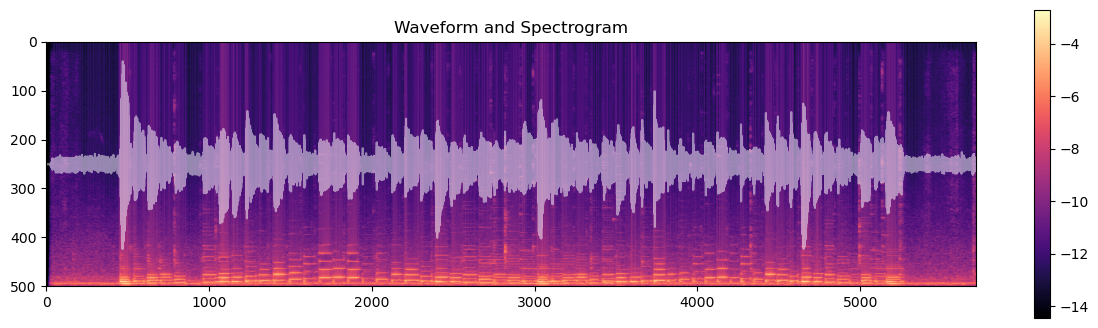

In [40]:
f, ax = plt.subplots(1, 1, figsize=(15,4))
hm = ax.imshow(np.flip(plot_data, axis=0), cmap='magma', aspect=3)
ax.plot(plotx, data2, 'w-', alpha=.5)
ax.set_title('Waveform and Spectrogram')
plt.colorbar(mappable=hm)
plt.show()

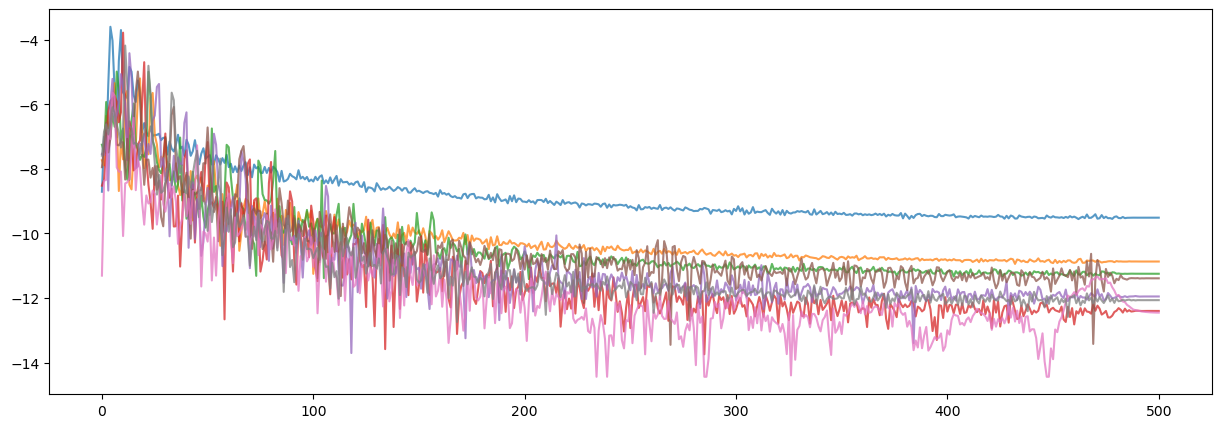

In [58]:
sp = plot_data[:, 500:2500:250]
fig, ax = plt.subplots(1,1,figsize=(15, 5))
for i in range(sp.shape[1]):
    ax.plot(
        # np.log(range(1, sp.shape[0] +1)), 
        range(sp.shape[0]),
        sp[:,i], 
        color=matplotlib.colormaps['tab10'](i), 
        alpha=.75)
plt.show()